<a href="https://colab.research.google.com/github/Yoshibansal/Machine-learning/blob/main/BitcoinHeistData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BitcoinHeistData

Features

    address: String. Bitcoin address.
    year: Integer. Year.
    day: Integer. Day of the year. 1 is the first day, 365 is the last day.
    length: Integer.
    weight: Float.
    count: Integer.
    looped: Integer.
    neighbors: Integer.
    income: Integer. Satoshi amount (1 bitcoin = 100 million satoshis).
    label: Category String. Name of the ransomware family (e.g., Cryptxxx, cryptolocker etc) or white (i.e., not known to be ransomware).

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00526/data.zip

--2022-02-16 12:21:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/00526/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116104947 (111M) [application/x-httpd-php]
Saving to: ‘data.zip’

data.zip            100%[===================>] 110.73M  87.8MB/s    in 1.3s    

2022-02-16 12:21:11 (87.8 MB/s) - ‘data.zip’ saved [116104947/116104947]



In [3]:
!unzip /content/data.zip -d /content/

Archive:  /content/data.zip
  inflating: /content/BitcoinHeistData.csv  


In [4]:
df = pd.read_csv('/content/BitcoinHeistData.csv')

In [5]:
df.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [6]:
print(df.label.unique())
print(f'Number of Classes: {len(df.label.unique())}')

['princetonCerber' 'princetonLocky' 'montrealCryptoLocker'
 'montrealCryptXXX' 'paduaCryptoWall' 'montrealWannaCry'
 'montrealDMALockerv3' 'montrealCryptoTorLocker2015' 'montrealSamSam'
 'montrealFlyper' 'montrealNoobCrypt' 'montrealDMALocker' 'montrealGlobe'
 'montrealEDA2' 'paduaKeRanger' 'montrealVenusLocker' 'montrealXTPLocker'
 'paduaJigsaw' 'montrealGlobev3' 'montrealJigSaw' 'montrealXLockerv5.0'
 'montrealXLocker' 'montrealRazy' 'montrealCryptConsole'
 'montrealGlobeImposter' 'montrealSam' 'montrealComradeCircle'
 'montrealAPT' 'white']
Number of Classes: 29


In [7]:
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [8]:
df.dropna()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


In [9]:
df.isnull().sum()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64

In [ ]:
# df.drop(df.tail(1).index,inplace=True)
# df.isnull().sum()

In [10]:
df.count()

address      2916697
year         2916697
day          2916697
length       2916697
weight       2916697
count        2916697
looped       2916697
neighbors    2916697
income       2916697
label        2916697
dtype: int64

In [11]:
df_arr = df.to_numpy()

X = df_arr[:, 1:-1]

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(df_arr[:, -1])
print(list(le.classes_))
y = le.transform(df_arr[:, -1])

['montrealAPT', 'montrealComradeCircle', 'montrealCryptConsole', 'montrealCryptXXX', 'montrealCryptoLocker', 'montrealCryptoTorLocker2015', 'montrealDMALocker', 'montrealDMALockerv3', 'montrealEDA2', 'montrealFlyper', 'montrealGlobe', 'montrealGlobeImposter', 'montrealGlobev3', 'montrealJigSaw', 'montrealNoobCrypt', 'montrealRazy', 'montrealSam', 'montrealSamSam', 'montrealVenusLocker', 'montrealWannaCry', 'montrealXLocker', 'montrealXLockerv5.0', 'montrealXTPLocker', 'paduaCryptoWall', 'paduaJigsaw', 'paduaKeRanger', 'princetonCerber', 'princetonLocky', 'white']


In [13]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (2916697, 8)
y shape: (2916697,)


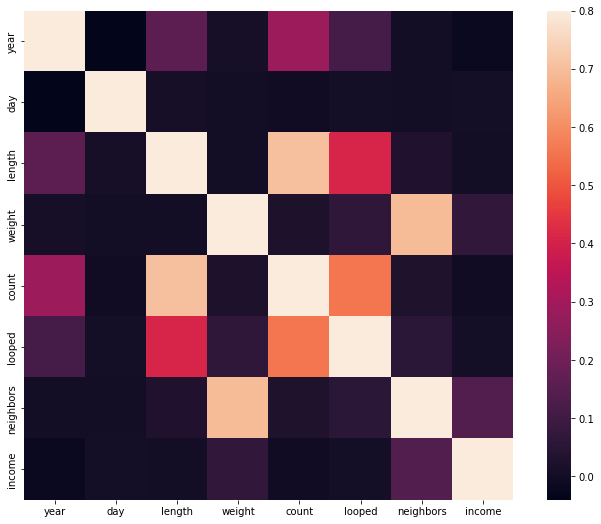

In [14]:
cor = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(cor, vmax=0.8, square=True)

In [15]:
df.columns

Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'label'],
      dtype='object')

In [16]:
pd.DataFrame(X, columns=df.columns[1:-1]).head()

,year,day,length,weight,count,looped,neighbors,income
0,2017,11,18,0.008333,1,0,2,100050000.0
1,2016,132,44,0.000244,1,0,1,100000000.0
2,2016,246,0,1.0,1,0,2,200000000.0
3,2016,322,72,0.003906,1,0,2,71200000.0
4,2016,238,144,0.072848,456,0,1,200000000.0


In [17]:
pd.DataFrame(y, columns=['Target']).head()

,Target
0,26
1,27
2,26
3,26
4,27


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=32)

In [19]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1458348, 8)
X_test shape: (1458349, 8)
y_train shape: (1458348,)
y_test shape: (1458349,)


In [20]:
X_train[0].shape

(8,)

## Decision Tree

In [21]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
print(f'Accuracy of DecisionTreeClassifier: {dtc.score(X_train, y_train)}')

Accuracy of DecisionTreeClassifier: 0.9996948602116916


In [25]:
y_pred = dtc.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

4.042570056961674
-0.5275602924255518


Threading

In [26]:
from joblib import parallel_backend

dtc_p = DecisionTreeClassifier()

with parallel_backend('threading', n_jobs=2):
  dtc_p.fit(X_train, y_train)

In [27]:
print(f'Accuracy of DecisionTreeClassifier with threading: {dtc_p.score(X_train, y_train)}')

y_pred_p = dtc_p.predict(X_test)

print(mean_squared_error(y_test, y_pred_p))
print(r2_score(y_test, y_pred_p))

Accuracy of DecisionTreeClassifier with threading: 0.9996948602116916
4.044732090878109
-0.5283772571571677


## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
KNN = KNeighborsClassifier(n_neighbors=29)

In [30]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [31]:
print(f'Accuracy of DecisionTreeClassifier with threading: {KNN.score(X_train, y_train)}')

y_pred = KNN.predict(X_test)

print(r2_score(y_test, y_pred))

Accuracy of DecisionTreeClassifier with threading: 0.9869749881372621
0.06906441305623257


Threading

In [32]:
with parallel_backend('threading', n_jobs=3):
  KNN.fit(X_train, y_train)

In [33]:
print(f'Accuracy of DecisionTreeClassifier with threading: {KNN.score(X_train, y_train)}')

y_pred_p = KNN.predict(X_test)
print(r2_score(y_test, y_pred_p))

Accuracy of DecisionTreeClassifier with threading: 0.9869749881372621
0.06906441305623257


## RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rdc = RandomForestClassifier()

In [36]:
rdc.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
print(f'Accuracy of DecisionTreeClassifier with threading: {rdc.score(X_train, y_train)}')

y_pred = rdc.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

Accuracy of DecisionTreeClassifier with threading: 0.999688003137797
2.3349671443529636
0.117689231460687


Threading

In [38]:
with parallel_backend('threading', n_jobs=3):
  rdc.fit(X_train, y_train)

In [39]:
print(f'Accuracy of DecisionTreeClassifier with threading: {rdc.score(X_train, y_train)}')

y_pred = rdc.predict(X_test)

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

Accuracy of DecisionTreeClassifier with threading: 0.9996893745525759
2.339609380196373
0.11593507629638633


Threading - 4 models

In [40]:
from sklearn.linear_model import LogisticRegression
import multiprocessing
import pickle

In [53]:
logistic = LogisticRegression(max_iter=25)
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=29)

In [56]:
def train_test(model):
    global X_train, y_train, X_test, y_train

    print(f'------- {model[1]} ------- ')

    # Train the model
    model[0].fit(X_train,y_train)

    # model score
    print(f'Score of {model[1]} model: {model[0].score(X_train, y_train)}')

    # predict
    y_pred = model[0].predict(X_test)

    # test
    print(f'Mean Squared Error of {model[1]} model: {mean_squared_error(y_test, y_pred)}')
    print(f'R2 Score of {model[1]} model: {r2_score(y_test, y_pred)}')

    # Save model
    pickle.dump(model[0],open(model[1],"wb"))
    print(f"{model[1]} MODEL SAVED")

    print('\n', '-'*20, '\n')

In [59]:
models = [
          [logistic,"logistic"], 
          [forest,"forest"], 
          [tree,"tree"], 
          [knn, "knn"]
          ]

In [61]:
pool = multiprocessing.Pool(processes = len(models))

%time pool.map(train_test, models)

------- forest ------- 
------- tree ------- 
------- logistic ------- 
------- knn ------- 
Score of tree model: 0.9996948602116916
Mean Squared Error of tree model: 4.016208054450615
R2 Score of tree model: -0.5175989194135076
tree MODEL SAVED

 -------------------- 

Score of knn model: 0.9869749881372621


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Score of logistic model: 0.9859203701722771
Mean Squared Error of logistic model: 2.6651795969277585
R2 Score of logistic model: -0.007087686072023702
logistic MODEL SAVED

 -------------------- 

Mean Squared Error of knn model: 2.4636489619425803
R2 Score of knn model: 0.06906441305623257
knn MODEL SAVED

 -------------------- 

Score of forest model: 0.9996832031860708
Mean Squared Error of forest model: 2.3465377629086044
R2 Score of forest model: 0.11331705801276837
forest MODEL SAVED

 -------------------- 

CPU times: user 5.02 s, sys: 825 ms, total: 5.85 s
Wall time: 12min 25s


[None, None, None, None]

In [62]:
!mkdir trained_models

In [63]:
!mv "/content/tree" "/content/trained_models"
!mv "/content/forest" "/content/trained_models"
!mv "/content/knn" "/content/trained_models"
!mv "/content/logistic" "/content/trained_models"

In [64]:
from google.colab import files

In [65]:
!zip -r /content/trained_models.zip /content/trained_models

  adding: content/trained_models/ (stored 0%)
  adding: content/trained_models/knn (deflated 74%)
  adding: content/trained_models/logistic (deflated 13%)
  adding: content/trained_models/tree (deflated 95%)
  adding: content/trained_models/forest (deflated 94%)


In [66]:
files.download('/content/trained_models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Neural Network

In [79]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report

print(tensorflow.__version__)

2.8.0


In [69]:
X = np.asarray(X).astype('float32')

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=32)

In [71]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1458348, 8)
X_test shape: (1458349, 8)
y_train shape: (1458348,)
y_test shape: (1458349,)


In [72]:
X_train[0].shape

(8,)

In [77]:
max(len(np.unique(y_train)), len(np.unique(y_test)))

29

In [101]:
model = Sequential()
model.add(keras.Input(shape=(8,)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(29, activation = "softmax"))


model.compile(RMSprop(), "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                576       
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 29)                1885      
                                                                 
Total params: 14,941
Trainable params: 14,941
Non-trai

In [102]:
BATCH_SIZE = 64
EPOCH = 5

In [103]:
model.fit(
    X_train, 
    y_train, 
    verbose=1,
    batch_size=BATCH_SIZE, 
    epochs=EPOCH,
    use_multiprocessing=True)

Epoch 1/5
22787/22787 [==============================] - 45s 2ms/step - loss: 67635.4062 - accuracy: 0.9778
Epoch 2/5
22787/22787 [==============================] - 48s 2ms/step - loss: 0.1004 - accuracy: 0.9859
Epoch 3/5
22787/22787 [==============================] - 44s 2ms/step - loss: 0.1008 - accuracy: 0.9859
Epoch 4/5
22787/22787 [==============================] - 61s 3ms/step - loss: 0.1009 - accuracy: 0.9859
Epoch 5/5
22787/22787 [==============================] - 54s 2ms/step - loss: 0.1010 - accuracy: 0.9859


In [106]:
# this will return 29 probabilities for every input  
y_pred_class = model.predict(X_test)

In [104]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [109]:
type(y_pred_class)

numpy.ndarray

In [132]:
# to get the output which have maximum probability
y_pred = y_pred_class.argmax(axis=1)

In [133]:
# lets check the shape
y_pred.shape, y_test.shape

((1458349,), (1458349,))

In [147]:
# Mean squared error of the model
mean_squared_error(y_pred, y_test)

2.6651795969277585

In [148]:
# r2 score of the model
r2_score(y_pred, y_test)

0.0

In [149]:
model.save('neural_network_model.h5')

In [150]:
files.download('/content/neural_network_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unbalance Classes in dataset

In [128]:
import collections

In [145]:
collections.Counter(y_train)

Counter({0: 6,
         2: 2,
         3: 1225,
         4: 4584,
         5: 21,
         6: 128,
         7: 164,
         8: 2,
         9: 3,
         10: 17,
         11: 31,
         12: 23,
         13: 3,
         14: 261,
         15: 5,
         17: 34,
         18: 4,
         19: 15,
         21: 3,
         22: 1,
         23: 6181,
         25: 5,
         26: 4583,
         27: 3232,
         28: 1437815})

In [129]:
collections.Counter(y_test)

Counter({0: 5,
         1: 1,
         2: 5,
         3: 1194,
         4: 4731,
         5: 34,
         6: 123,
         7: 190,
         8: 4,
         9: 6,
         10: 15,
         11: 24,
         12: 11,
         13: 1,
         14: 222,
         15: 8,
         16: 1,
         17: 28,
         18: 3,
         19: 13,
         20: 1,
         21: 4,
         22: 7,
         23: 6209,
         24: 2,
         25: 5,
         26: 4640,
         27: 3393,
         28: 1437469})

In [134]:
collections.Counter(y_pred)

Counter({28: 1458349})

Yoshi Bansal

E19CSE332

bansalyoshi@gmail.com

END NOTE and Conclusion

Since y=28 is in majority; data is unblanced and hence model is BIASED due to this.. We can solve this problem either by:

    collecting more data for other classes or 
    by assiging weights to the data.

**Although all models trained above show high accuracy (both train and test) they are not good for using in real world.**

END